In [1]:
# First we import the databases and libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfpop = pd.read_excel("IndicadoresINEGI.xlsx")

In [3]:
dfunam1 = pd.read_excel("unam_pe_desde_1924.xlsx", sheet_name = "población 1924-1969")
dfunam2 = pd.read_excel("unam_pe_desde_1924.xlsx", sheet_name = "población 1970-2024")

# Adjusting Dataframes

A visualization of the dataframes

In [6]:
dfpop.head(2)

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,1900,1910,1921,1930,...,2016,2017,2018,2019,2020,2021,2030,2040,2050,unidad_medida
0,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1002000001,Población total,NaN,15160369.0,14334780.0,16552722.0,...,NaN,NaN,NaN,NaN,126014024.0,NaN,NaN,NaN,NaN,Número de personas
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1002000002,Población total hombres,NaN,7504471.0,7003785.0,8119004.0,...,NaN,NaN,NaN,NaN,61473390.0,NaN,NaN,NaN,NaN,Número de personas


In [8]:
dfunam1.head(6)

,CUADRO I,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,UNAM. Población escolar total,NaN,NaN,NaN
2,1924-1969,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Año,En planteles de bachillerato,En facultades y escuelas de educación superior,Total
5,1924,2328,7294,9622


In [10]:
dfunam2.head(6)

,CUADRO II,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,UNAM. Población escolar totala,NaN,NaN,NaN,NaN,NaN
2,1970-2024,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Año,Bachilleratob,Técnicoc,Licenciatura,Posgrado,Total
5,1970,39943,1599,61709,2930,106181


The information throughout the years of UNAM students is divided into two different sheets, that’s why there are two data frames that we will join. But first, let’s give them format, as we see that the columns are not well placed and labeled, and there are rows that should not be there. The "SP" in "Postsecundary SP" and "Secondary/Technical SP" stands for Students population

In [13]:
# We rename the Columns of the UNAM's dataframes
dfunam1 = dfunam1.rename(columns = {'CUADRO I':'Year', 'Unnamed: 1':'Secondary/Technical SP',
                                  'Unnamed: 2':'Postsecondary SP', 'Unnamed: 3':'Total SP'})
dfunam2 = dfunam2.rename(columns = {'CUADRO II':'Year', 'Unnamed: 1':'Secondary',
                                  'Unnamed: 2':'Technical', 'Unnamed: 3':'Undergraduate',
                                   'Unnamed: 4':'Masters, Doctoral & post', 'Unnamed: 5':'Total SP' })

In [15]:
# And eliminate the data that we don't need
dfunam1 = dfunam1.drop([i for i in range(51,54)])
dfunam1 = dfunam1.drop([i for i in range(0,5)])
dfunam2 = dfunam2.drop([i for i in range(60,71)])
dfunam2 = dfunam2.drop([i for i in range(0,5)])


# We set the year as the index
dfunam1 = dfunam1.set_index("Year")
dfunam2 = dfunam2.set_index("Year")

Now we're interested in categorizing the students in those in Secondary and Technical education, and
those in postsecondary education. For the first UNAM data set it's already done, so we focus only in do so in
the second one.

In [18]:
# We sum the students in each category
dfunam2["Secondary/Technical SP"] = dfunam2["Secondary"] + dfunam2['Technical']
dfunam2["Postsecondary SP"] = dfunam2["Undergraduate"] + dfunam2['Masters, Doctoral & post']

# We drop the colums that we don't want
dfunam2 = dfunam2.drop(['Secondary', 'Technical', 'Undergraduate', 'Masters, Doctoral & post'], axis=1)

# We rearrange the columns so Total is on the right
dfunam2 = dfunam2[["Secondary/Technical SP", "Postsecondary SP", "Total SP"]]

And finally join the dataframes

In [21]:
dfunam = pd.concat([dfunam1, dfunam2])
dfunam

,Secondary/Technical SP,Postsecondary SP,Total SP
Year,,,
1924,2328,7294,9622
1925,2810,7776,10586
1926,1772,8407,10179
1927,1479,6952,8431
1928,1315,7275,8590
...,...,...,...
2020,112441,248442,360883
2021,109563,257367,366930
2022,107263,262344,369607


Now, about the INEGI's data, we care about the populations data of two provinces.
We filter the data as follows. The exact number for _cve_municipio_ and _id_indicador_ are provided in the information of the database.

In [24]:
# We filter the data
dfpop = dfpop[(dfpop["desc_entidad"] == "Ciudad de México") | ( dfpop["desc_entidad"] == "México") ]
dfpop = dfpop[ dfpop["cve_municipio"] == 0 ]
dfpop = dfpop[ dfpop["id_indicador"] == 1002000001 ]

# We traspose the dataframe to add the populations
dfpop = dfpop.T

Then we remove the unwanted data, which is not going to sum

In [27]:
dfpop = dfpop.dropna()
dfpop = dfpop.drop(["cve_entidad","desc_entidad","desc_municipio","cve_municipio",
                        "id_indicador", "indicador", "unidad_medida"])

And finally for this dataframe we add the populations, but first turn the data into integers

In [29]:
dfpop = dfpop.astype({37474:'int64', 90293:'int64'})
dfpop["Total Population"] = dfpop[37474] + dfpop[90293]
dfpop.index.name = "Year"
dfpop.index = dfpop.index.astype(int)

And lastly we joint all the dataframes, and keep the columns that we want

In [129]:
df = pd.merge(dfpop, dfunam, how='inner', left_index=True, right_index=True)
df = df[["Total Population", "Secondary/Technical SP", "Postsecondary SP", "Total SP"]]

And we obtain the proportions

In [132]:
df["S/T Studens Prop"] = df["Secondary/Technical SP"]/df["Total Population"]
df["PostS Studens Prop"] = df["Postsecondary SP"]/df["Total Population"]
df["Total Studens Prop"] = df["Total SP"]/df["Total Population"]

# Making the graph

To make the data easer to read, let's turn the proportions in percentages

In [134]:
df["S/T Studens Prop"] = 100*df["S/T Studens Prop"]
df["PostS Studens Prop"] = 100*df["PostS Studens Prop"]

Then we make the graph

Text(2020, 0.8981664286601336, '0.95%')

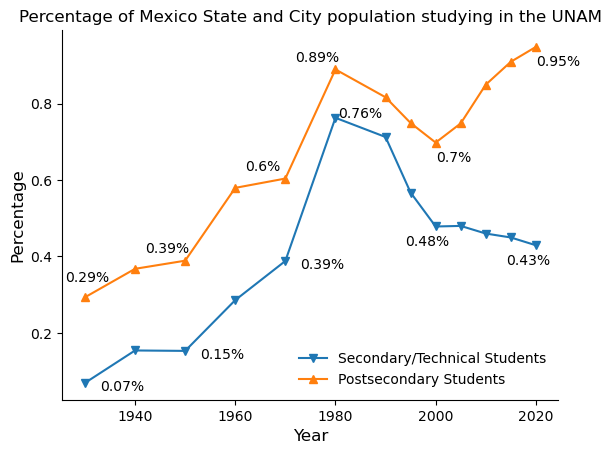

In [288]:
# Title set
plt.title("Percentage of Mexico State and City population studying in the UNAM")

# Plot the lines
STP = plt.plot(df.index, df["S/T Studens Prop"], marker = 'v', linestyle='-' ,
         label = 'Secondary/Technical Students')
PSP = plt.plot(df.index, df["PostS Studens Prop"],  marker = '^', linestyle='-',
        label = 'Postsecondary Students')

#Legend and axes labels
plt.legend(loc = 4, frameon=False)
plt.ylabel("Percentage", size=12)
plt.xlabel("Year", size=12)


ax = plt.gca()
# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Show only left and bottom spines
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Put the percentage of certain points
plt.gca().text( df.index[0] + 3,  df["S/T Studens Prop"][1930] - 0.02, str( round(df["S/T Studens Prop"][1930], 2))+"%" )
plt.gca().text( df.index[2] + 3,  df["S/T Studens Prop"][1950] - 0.02, str( round(df["S/T Studens Prop"][1950], 2))+"%" )
plt.gca().text( df.index[4] + 3,  df["S/T Studens Prop"][1970] - 0.02, str( round(df["S/T Studens Prop"][1970], 2))+"%" )
plt.gca().text( df.index[5] + 0.5,  df["S/T Studens Prop"][1980], str( round(df["S/T Studens Prop"][1980], 2))+"%" )
plt.gca().text( df.index[8] - 6,  df["S/T Studens Prop"][2000] - 0.05, str( round(df["S/T Studens Prop"][2000], 2))+"%" )
plt.gca().text( df.index[12] - 6,  df["S/T Studens Prop"][2020] - 0.05, str( round(df["S/T Studens Prop"][2020], 2))+"%" )

# Put the percentage of certain points
plt.gca().text( df.index[0] - 4,  df["PostS Studens Prop"][1930] + 0.04, str( round(df["PostS Studens Prop"][1930], 2))+"%" )
plt.gca().text( df.index[2] - 8,  df["PostS Studens Prop"][1950] + 0.02, str( round(df["PostS Studens Prop"][1950], 2))+"%" )
plt.gca().text( df.index[4] - 8,  df["PostS Studens Prop"][1970] + 0.02, str( round(df["PostS Studens Prop"][1970], 2))+"%" )
plt.gca().text( df.index[5] - 8,  df["PostS Studens Prop"][1980] + 0.02, str( round(df["PostS Studens Prop"][1980], 2))+"%" )
plt.gca().text( df.index[8] ,  df["PostS Studens Prop"][2000] - 0.05, str( round(df["PostS Studens Prop"][2000], 2))+"%" )
plt.gca().text( df.index[12],  df["PostS Studens Prop"][2020] - 0.05, str( round(df["PostS Studens Prop"][2020], 2))+"%" )

In [224]:
df

,Total Population,Secondary/Technical SP,Postsecondary SP,Total SP,S/T Studens Prop,PostS Studens Prop,Total Studens Prop
Year,,,,,,,
1930,2219688,1528,6503,8031,0.068839,0.292969,0.003618
1940,2903564,4465,10670,15135,0.153777,0.367479,0.005213
1950,4443065,6783,17271,24054,0.152665,0.388718,0.005414
1960,6768727,19328,39213,58541,0.285549,0.579326,0.008649
1970,10707350,41542,64639,106181,0.387976,0.603688,0.009917
1980,16395414,125045,145799,270844,0.762683,0.889267,0.016519
1990,18051539,128601,147373,275974,0.71241,0.816401,0.015288
1995,20196971,114516,151281,265797,0.566996,0.749028,0.01316
2000,21701925,103784,151442,255226,0.478225,0.697827,0.011761
